In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dynamics in ENR space

Shape of operators in restricted space: [[3], [3]]


  1% |░░░░░░░░░░| [00:00<00:00, 2141.04%/s]

100% |██████████| [00:00<00:00, 11663.16%/s]


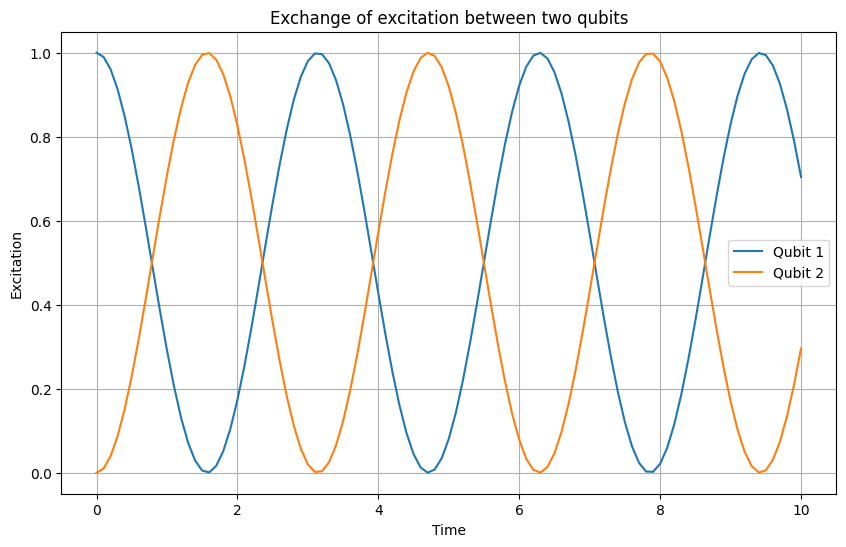

In [31]:
import jaxquantum as jqt
import jax.numpy as jnp
import matplotlib.pyplot as plt

# # Excitation Number Restricted (ENR) States
# 
# In quantum systems, we often work with states that have a limited number of excitations. 
# For example, in a system of qubits, we might want to restrict our analysis to states 
# with at most one excitation. This tutorial demonstrates how to use JaxQuantum's ENR 
# features to work with such restricted state spaces.

# ## Basic Concepts
# 
# Consider a system of two qubits. The full Hilbert space includes four states:
# - |00⟩ (0 excitations)
# - |01⟩ (1 excitation)
# - |10⟩ (1 excitation)
# - |11⟩ (2 excitations)
#
# If we restrict to at most 1 excitation, we only work with:
# - |00⟩
# - |01⟩
# - |10⟩

# Let's create ENR operators for this system:
dims = [2, 2]  # Two qubits
n_excitations = 1  # Restrict to 0 or 1 excitations

# Create destruction operators in the ENR basis
a_ops = jqt.enr_destroy(dims, n_excitations)

# Create the identity operator in this restricted space
I = jqt.enr_identity(dims, n_excitations)

print(f"Shape of operators in restricted space: {a_ops[0].dims}")

# ## Example: Qubit Exchange Dynamics
#
# Let's simulate a simple system where two qubits exchange an excitation.
# The Hamiltonian for this system is:
# H = a₁†a₂ + a₂†a₁

# Create the Hamiltonian
H = a_ops[0].dag() @ a_ops[1] + a_ops[1].dag() @ a_ops[0]

# Initial state - first qubit excited, second in ground state
initial_state = jqt.enr_fock(dims, n_excitations, [1, 0])  # first qubit excited, second in ground state

# Time evolution
ts = jnp.linspace(0, 10, 101)
results = jqt.sesolve(initial_state, ts, H0=H)

# Calculate expectation values for number operators
n1 = a_ops[0].dag() @ a_ops[0]
n2 = a_ops[1].dag() @ a_ops[1]

n1_t = jqt.calc_expect(n1, results)
n2_t = jqt.calc_expect(n2, results)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(ts, jnp.real(n1_t), label='Qubit 1')
plt.plot(ts, jnp.real(n2_t), label='Qubit 2')
plt.xlabel('Time')
plt.ylabel('Excitation')
plt.title('Exchange of excitation between two qubits')
plt.legend()
plt.grid(True)
plt.show()

# ENR state dictionaries

In [32]:
# Example using enr_state_dictionaries
dims = [2, 2]  # Two qubits
n_excitations = 1  # Restrict to 0 or 1 excitations

# Get the state dictionaries
n_states, state_to_idx, idx_to_state = jqt.enr_state_dictionaries(dims, n_excitations)

# Print the mappings
print("State to Index mapping:")
for state, idx in state_to_idx.items():
    print(f"|{state}⟩ → {idx}")

print("\nIndex to State mapping:")
for idx, state in idx_to_state.items():
    print(f"{idx} → |{state}⟩")

# Example: Find the index of state |01⟩
state_01 = (0, 1)
idx = state_to_idx[state_01]
print(f"\nIndex for state |01⟩: {idx}")

# Example: Find which state corresponds to index 2
state = idx_to_state[2]
print(f"State for index 2: |{state}⟩")

State to Index mapping:
|(1, 0)⟩ → 0
|(0, 0)⟩ → 1
|(0, 1)⟩ → 2

Index to State mapping:
0 → |(1, 0)⟩
1 → |(0, 0)⟩
2 → |(0, 1)⟩

Index for state |01⟩: 2
State for index 2: |(0, 1)⟩
